In [371]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv("winequalityN.csv")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [373]:
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [375]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [376]:
classic_df = df.dropna(axis=0)
classic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [377]:
different_df = df
different_df['fixed acidity'] = different_df['fixed acidity'].fillna(different_df['fixed acidity'].mean())
different_df['volatile acidity'] = different_df['volatile acidity'].fillna(different_df['volatile acidity'].mean())
different_df['citric acid'] = different_df['citric acid'].fillna(different_df['citric acid'].mean())
different_df['residual sugar'] = different_df['residual sugar'].fillna(different_df['residual sugar'].mean())
different_df['chlorides'] = different_df['chlorides'].fillna(different_df['chlorides'].mean())
different_df['pH'] = different_df['pH'].fillna(different_df['pH'].mean())
different_df['sulphates'] = different_df['sulphates'].fillna(different_df['sulphates'].mean())

different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [378]:
classic_df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [379]:
X = classic_df.drop(columns="quality")
y = classic_df['quality']

X.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [380]:
y.head(15)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    5
11    5
12    5
13    7
14    5
Name: quality, dtype: int64

In [381]:
bins = [0, 5.5, 10]
labels = ["average", "good"]
y = pd.cut(y, bins=bins, labels=labels)
y.head(15)

0        good
1        good
2        good
3        good
4        good
5        good
6        good
7        good
8        good
9        good
10    average
11    average
12    average
13       good
14    average
Name: quality, dtype: category
Categories (2, object): ['average' < 'good']

In [382]:
le = LabelEncoder()
y = le.fit_transform(y)
y[:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [383]:
X['type'] = le.fit_transform(X['type'])
X[:5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [384]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(6463, 12)

In [385]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=60)

In [386]:
clf = tree.DecisionTreeClassifier()
clf_smaller = tree.DecisionTreeClassifier(max_depth=3)

In [387]:
clf = clf.fit(x_train, y_train)
clf_smaller = clf_smaller.fit(x_train, y_train)

[Text(0.4944074681838286, 0.9827586206896551, 'x[11] <= -0.399\ngini = 0.465\nsamples = 4524\nvalue = [1664, 2860]'),
 Text(0.17621651046104325, 0.9482758620689655, 'x[2] <= -0.62\ngini = 0.491\nsamples = 1973\nvalue = [1120, 853]'),
 Text(0.05542932878916974, 0.9137931034482759, 'x[4] <= 0.043\ngini = 0.406\nsamples = 481\nvalue = [136, 345]'),
 Text(0.030389094007384265, 0.8793103448275862, 'x[6] <= -0.395\ngini = 0.488\nsamples = 158\nvalue = [67, 91]'),
 Text(0.018176654359556944, 0.8448275862068966, 'x[4] <= -0.156\ngini = 0.472\nsamples = 63\nvalue = [39, 24]'),
 Text(0.01438985136798258, 0.8103448275862069, 'x[5] <= 0.198\ngini = 0.444\nsamples = 57\nvalue = [38, 19]'),
 Text(0.01136040897472309, 0.7758620689655172, 'x[8] <= -0.066\ngini = 0.385\nsamples = 50\nvalue = [37, 13]'),
 Text(0.009845687778093345, 0.7413793103448276, 'x[10] <= 0.395\ngini = 0.456\nsamples = 37\nvalue = [24, 13]'),
 Text(0.0060588847865189815, 0.7068965517241379, 'x[2] <= -0.878\ngini = 0.404\nsamples =

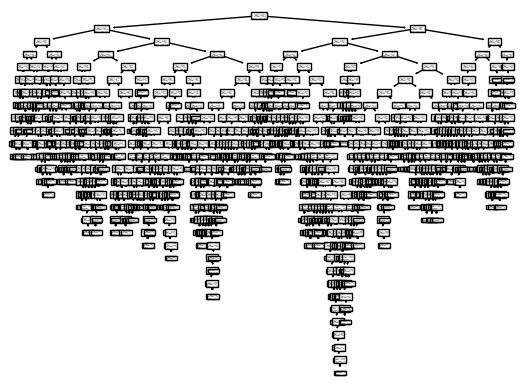

In [388]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'x[11] <= -0.399\ngini = 0.465\nsamples = 4524\nvalue = [1664, 2860]'),
 Text(0.25, 0.625, 'x[2] <= -0.62\ngini = 0.491\nsamples = 1973\nvalue = [1120, 853]'),
 Text(0.125, 0.375, 'x[4] <= 0.043\ngini = 0.406\nsamples = 481\nvalue = [136, 345]'),
 Text(0.0625, 0.125, 'gini = 0.488\nsamples = 158\nvalue = [67, 91]'),
 Text(0.1875, 0.125, 'gini = 0.336\nsamples = 323\nvalue = [69, 254]'),
 Text(0.375, 0.375, 'x[2] <= -0.225\ngini = 0.449\nsamples = 1492\nvalue = [984, 508]'),
 Text(0.3125, 0.125, 'gini = 0.494\nsamples = 509\nvalue = [283, 226]'),
 Text(0.4375, 0.125, 'gini = 0.409\nsamples = 983\nvalue = [701, 282]'),
 Text(0.75, 0.625, 'x[11] <= 0.865\ngini = 0.336\nsamples = 2551\nvalue = [544, 2007]'),
 Text(0.625, 0.375, 'x[2] <= -0.408\ngini = 0.411\nsamples = 1655\nvalue = [479, 1176]'),
 Text(0.5625, 0.125, 'gini = 0.315\nsamples = 874\nvalue = [171, 703]'),
 Text(0.6875, 0.125, 'gini = 0.478\nsamples = 781\nvalue = [308, 473]'),
 Text(0.875, 0.375, 'x[2] <= 0.8

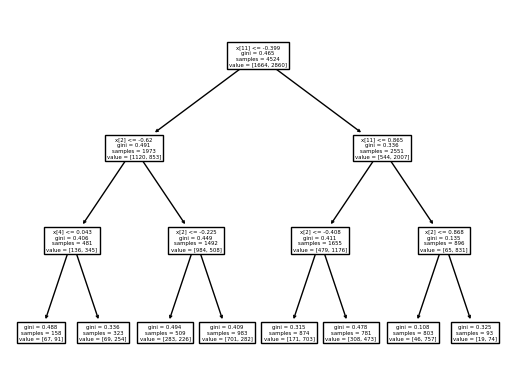

In [389]:
tree.plot_tree(clf_smaller)

In [390]:
prediction = clf.predict(x_test)
prediction_smaller = clf_smaller.predict(x_test)

print("Accuracy on test data set with bigger tree: ", accuracy_score(prediction, y_test))
print("Accuracy on test data set with smaller tree: ", accuracy_score(prediction_smaller, y_test))

Accuracy on test data set with bigger tree:  0.7663744198040227
Accuracy on test data set with smaller tree:  0.7343991748323878


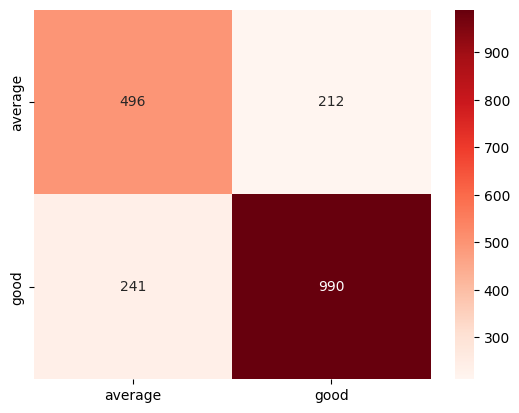

In [391]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

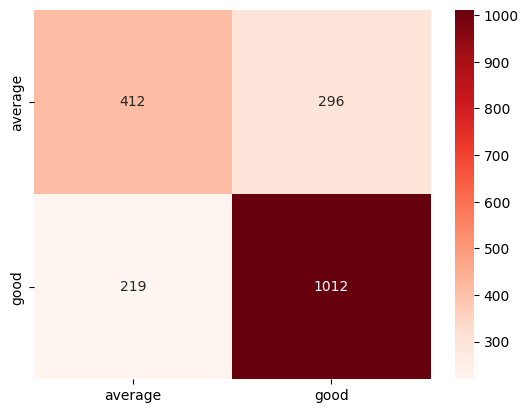

In [392]:
ax = sns.heatmap(confusion_matrix(y_test, prediction_smaller), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [393]:
model = GaussianNB()
model.fit(x_train, y_train)
print("Accuracy on test data set: ", model.score(x_test, y_test))

Accuracy on test data set:  0.6967509025270758


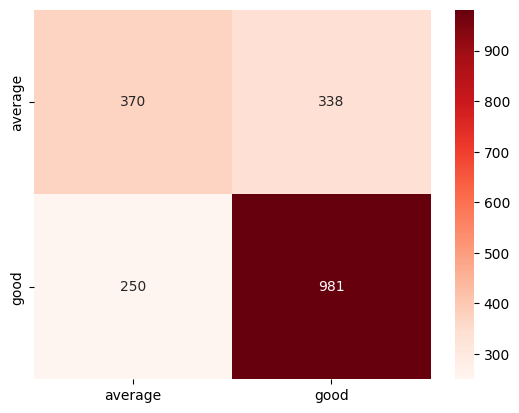

In [394]:
prediction = model.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [395]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7488396080453842


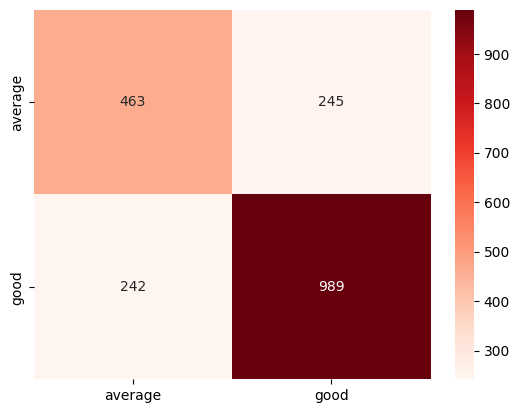

In [396]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [397]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7452294997421351


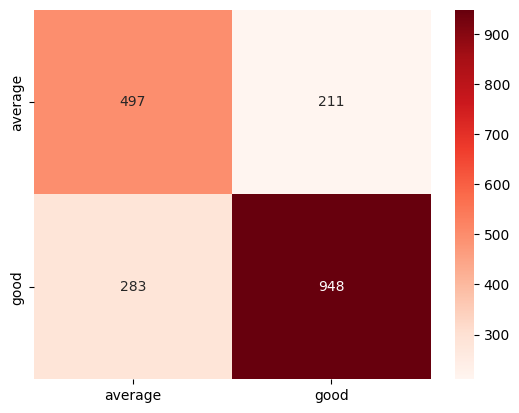

In [398]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [399]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7519339865910263


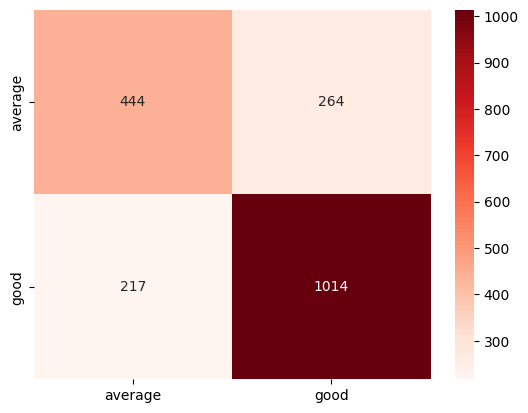

In [400]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [401]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7550283651366684


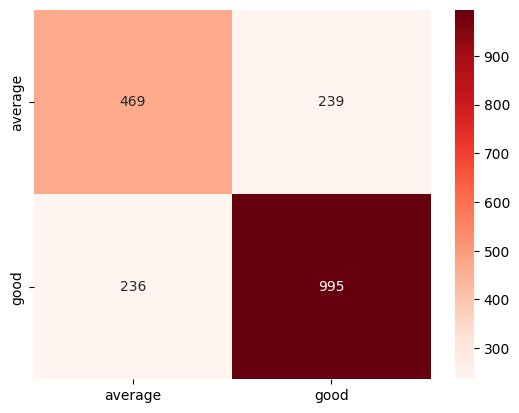

In [402]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [403]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, activation='relu')
clf = clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

print("Accuracy on test data set: ", accuracy_score(prediction, y_test))

Accuracy on test data set:  0.7612171222279526


c:\Users\Piotr Damrych\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


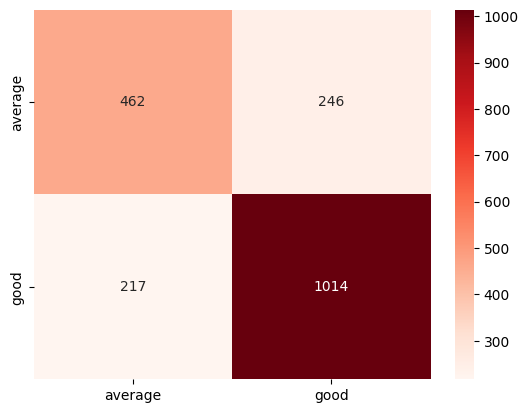

In [404]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

In [405]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test_to_validation = keras.utils.to_categorical(y_test, num_classes=2)
y_train[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [406]:
model = Sequential()
model.add(Dense(3, activation='relu', input_dim=(x_train.shape[1])))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, epochs=70, verbose=0, validation_data=(x_test, y_test_to_validation), callbacks=[es_callback])

In [407]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 966us/step
Accuracy:  0.7545126353790613


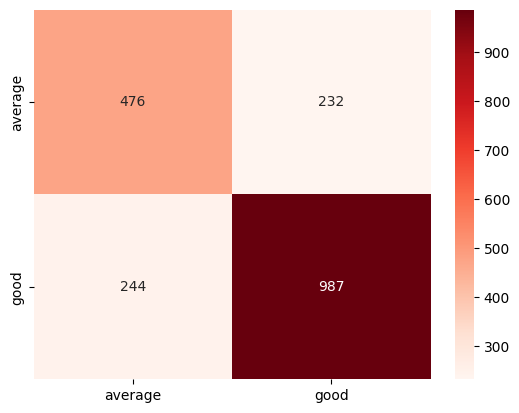

In [408]:
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

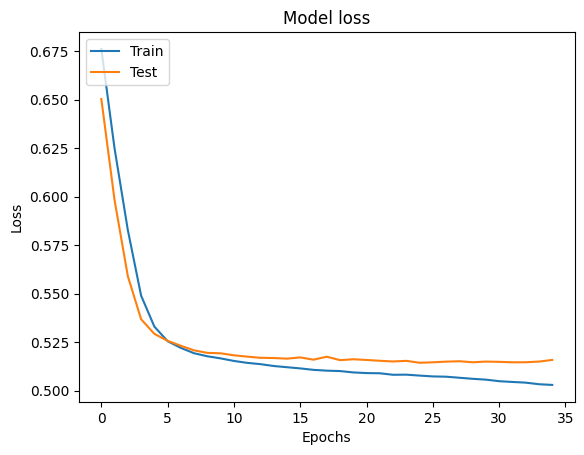

In [409]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()